# Home 4: Build a CNN for image recognition.

### Name: [Yi Lin]


## 0. You will do the following:

1. Read, complete, and run the code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
    * Missing **the output after execution** will not be graded.
    
4. Upload this .HTML file to your Google Drive, Dropbox, or Github repo. (If you submit the file to Google Drive or Dropbox, you must make the file "open-access". The delay caused by "deny of access" may result in late penalty.)

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583-2020S/blob/master/homework/HM4/HM4.html


## Requirements:

1. You can use whatever CNN architecture, including VGG, Inception, and ResNet. However, you must build the networks layer by layer. You must NOT import the archetectures from ```keras.applications```.

2. Make sure ```BatchNormalization``` is between a ```Conv```/```Dense``` layer and an ```activation``` layer.

3. If you want to regularize a ```Conv```/```Dense``` layer, you should place a ```Dropout``` layer **before** the ```Conv```/```Dense``` layer.

4. An accuracy above 70% is considered reasonable. An accuracy above 80% is considered good. Without data augmentation, achieving 80% accuracy is difficult.


## Google Colab

- If you do not have GPU, the training of a CNN can be slow. Google Colab is a good option.

- Keep in mind that you must download it as an IPYNB file and then use IPython Notebook to convert it to HTML.

- Also keep in mind that the IPYNB and HTML files must contain the outputs. (Otherwise, the instructor will not be able to know the correctness and performance.) Do the followings to keep the outputs.

- In Colab, go to ```Runtime``` --> ```Change runtime type``` --> Do NOT check ```Omit code cell output when saving this notebook```. In this way, the downloaded IPYNB file contains the outputs.

## 1. Data preparation

### 1.1. Load data


In [2]:
from keras.datasets import cifar10
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    one_hot_matrix = numpy.zeros((y.shape[0], num_class))
    for i in range(y.shape[0]):
        one_hot_numbers = y[i][0]
        one_hot_matrix[i][one_hot_numbers] = 1
    return one_hot_matrix

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [ ]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping




model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 64)       

In [ ]:
from keras import optimizers

learning_rate = 1E-5 # to be tuned!
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

In [ ]:
history = model.fit(x_tr, y_tr, batch_size=32, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
1250/1250 [==============================] - 515s 410ms/step - loss: 3.0131 - acc: 0.1078 - val_loss: 2.5359 - val_acc: 0.1021
Epoch 2/100
1250/1250 [==============================] - 512s 410ms/step - loss: 2.7155 - acc: 0.1482 - val_loss: 2.5107 - val_acc: 0.1087
Epoch 3/100
1250/1250 [==============================] - 512s 410ms/step - loss: 2.4918 - acc: 0.1851 - val_loss: 2.4757 - val_acc: 0.1125
Epoch 4/100
1250/1250 [==============================] - 514s 412ms/step - loss: 2.3325 - acc: 0.2098 - val_loss: 2.4567 - val_acc: 0.1123
Epoch 5/100
1250/1250 [==============================] - 513s 410ms/step - loss: 2.2037 - acc: 0.2344 - val_loss: 2.4265 - val_acc: 0.1175
Epoch 6/100
1250/1250 [==============================] - 512s 409ms/step - loss: 2.1079 - acc: 0.2468 - val_loss: 2.3900 - val_acc: 0.1222
Epoch 7/100
1250/1250 [==============================] - 512s 410ms/step - loss: 2.0155 - acc: 0.2657 - val_loss: 2.3828 - val_acc: 0.1271
Epoch 8/100
1250/1250 [====

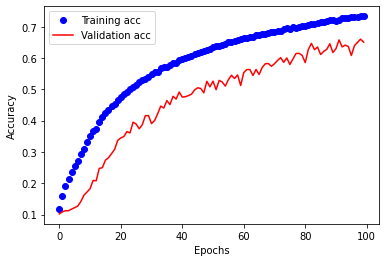

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [5]:
# <Compile your model again (using the same hyper-parameters)>
# ...
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras import optimizers



model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(300))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))
model.summary()

learning_rate = 1E-5 # to be tuned!
# es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        2

In [6]:
# <Train your model on the entire training set (50K samples)>
# <Use (x_train, y_train_vec) instead of (x_tr, y_tr)>
# <Do NOT use the validation_data option (because now you do not have validation data)>
# ...
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 141s 91ms/step - loss: 2.8704 - acc: 0.1248
Epoch 2/100
1563/1563 [==============================] - 139s 89ms/step - loss: 2.5621 - acc: 0.1682
Epoch 3/100
1563/1563 [==============================] - 141s 90ms/step - loss: 2.3514 - acc: 0.2074
Epoch 4/100
1563/1563 [==============================] - 141s 90ms/step - loss: 2.1897 - acc: 0.2387
Epoch 5/100
1563/1563 [==============================] - 142s 91ms/step - loss: 2.0786 - acc: 0.2626
Epoch 6/100
1563/1563 [==============================] - 143s 91ms/step - loss: 1.9729 - acc: 0.2828
Epoch 7/100
1563/1563 [==============================] - 142s 91ms/step - loss: 1.8877 - acc: 0.3107
Epoch 8/100
1563/1563 [==============================] - 140s 90ms/step - loss: 1.8125 - acc: 0.3317
Epoch 9/100
1563/1563 [==============================] - 142s 91ms/step - loss: 1.7521 - acc: 0.3524
Epoch 10/100
1563/1563 [==============================] - 143s 92ms/step - loss: 1.6961 - a

1563/1563 [==============================] - 147s 94ms/step - loss: 0.7800 - acc: 0.7284
Epoch 80/100
1563/1563 [==============================] - 147s 94ms/step - loss: 0.7758 - acc: 0.7311
Epoch 81/100
1563/1563 [==============================] - 147s 94ms/step - loss: 0.7744 - acc: 0.7303
Epoch 82/100
1563/1563 [==============================] - 146s 94ms/step - loss: 0.7620 - acc: 0.7367
Epoch 83/100
1563/1563 [==============================] - 146s 93ms/step - loss: 0.7623 - acc: 0.7345
Epoch 84/100
1563/1563 [==============================] - 144s 92ms/step - loss: 0.7589 - acc: 0.7360
Epoch 85/100
1563/1563 [==============================] - 146s 93ms/step - loss: 0.7501 - acc: 0.7403
Epoch 86/100
1563/1563 [==============================] - 146s 93ms/step - loss: 0.7528 - acc: 0.7387
Epoch 87/100
1563/1563 [==============================] - 145s 93ms/step - loss: 0.7520 - acc: 0.7397
Epoch 88/100
1563/1563 [==============================] - 146s 94ms/step - loss: 0.7414 - acc: 

### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [8]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 5s 16ms/step - loss: 1.1008 - acc: 0.6725
loss = 1.100770115852356
accuracy = 0.6725000143051147
